In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import ast

# Clean data without location

In [28]:
df = pd.read_csv('../data_cleaning/clean_data.csv')
len(df)

10800

In [29]:
# read stanza
stanza_label = []
with open('../model/stanzaResult.txt', 'r') as f:
    for line in f:
        data = json.loads(line)
        stanza_label.append(data.get('label'))


In [30]:
# read cadiffNlp label from huggingface
cardiff_label = []
cardiff_score = []
with open('../model/cardiffResult.txt', 'r') as f:
    for line in f:
        line = line.strip()
        data = ast.literal_eval(line)
        if data.get('label') == 'LABEL_0': 
            label = 0
        elif data.get('label') == 'LABEL_1':
            label = 1 
        else:
            label = 2 
        cardiff_label.append(label)
        cardiff_score.append(data.get('score'))

In [31]:
df['cardiff_label'] = cardiff_label
df['cardiff_score'] = cardiff_score

In [32]:
df.head()

,tweetId,author_id,tweet,lang,created_at,clean_tweet,cardiff_label,cardiff_score
0,1490905225930190849,2578185314,"In 2021, Reliance acquired @faradion_uk Ltd, l...",en,2022-02-08 04:28:00+00:00,2021 reliance acquired ltd leading global sodi...,2,0.791140
1,1490905219286245376,291609629,"Hong Kong to tighten social-distancing rules, ...",en,2022-02-08 04:27:58+00:00,hong kong tighten social distancing rules stan...,1,0.809638
2,1490905197375553537,1320755164827938816,"you would know if someone lie, why those peopl...",en,2022-02-08 04:27:53+00:00,you would know if someone lie why those people...,0,0.719635
3,1490905197123620864,983016607,Doing. Experience and environment may shape yo...,en,2022-02-08 04:27:53+00:00,doing experience environment may shape you nam...,1,0.877347
4,1490905176953454597,2675645600,@jenhada @airallianceHOU How does the communit...,en,2022-02-08 04:27:48+00:00,how does community hold valero accountable tox...,0,0.871542


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tweetId        10800 non-null  int64  
 1   author_id      10800 non-null  int64  
 2   tweet          10800 non-null  object 
 3   lang           10800 non-null  object 
 4   created_at     10800 non-null  object 
 5   clean_tweet    10800 non-null  object 
 6   cardiff_label  10800 non-null  int64  
 7   cardiff_score  10800 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 675.1+ KB


In [34]:
# frequency distribution of the labels
df['created_at'] = pd.to_datetime(df['created_at'])
df['created_at'] = df['created_at'].dt.strftime('%m/%d/%Y')


In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tweetId        10800 non-null  int64  
 1   author_id      10800 non-null  int64  
 2   tweet          10800 non-null  object 
 3   lang           10800 non-null  object 
 4   created_at     10800 non-null  object 
 5   clean_tweet    10800 non-null  object 
 6   cardiff_label  10800 non-null  int64  
 7   cardiff_score  10800 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 675.1+ KB


In [36]:
# plt based on time
df['created_at'].unique()

array(['02/08/2022', '02/07/2022', '02/19/2022', '02/22/2022'],
      dtype=object)

In [39]:
df.groupby(['created_at'])['tweetId'].count()

created_at
02/07/2022    3179
02/08/2022    6821
02/19/2022     100
02/22/2022     700
Name: tweetId, dtype: int64

In [42]:
two_days_tweets_df = df.loc[(df['created_at'] == '02/07/2022') | (df['created_at'] == '02/08/2022')]
two_days_tweets_df.groupby(['created_at'])['tweetId'].count()

created_at
02/07/2022    3179
02/08/2022    6821
Name: tweetId, dtype: int64

In [43]:
two_days_tweets_df.groupby(['cardiff_label'])['cardiff_label'].count()

cardiff_label
0    2971
1    4013
2    3016
Name: cardiff_label, dtype: int64

In [47]:
list(two_days_tweets_df.groupby(['cardiff_label'])['cardiff_label'].count())

[2971, 4013, 3016]

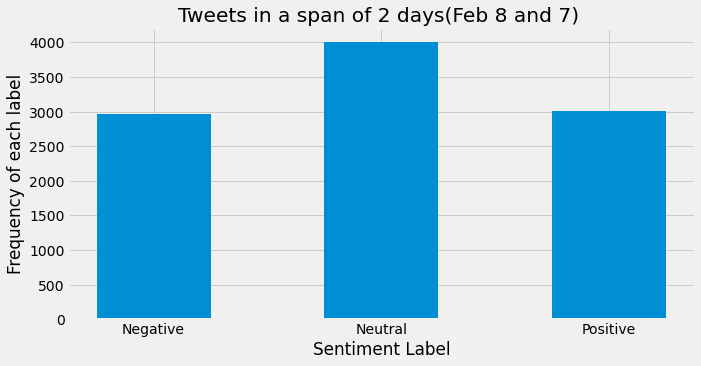

In [56]:
plt.style.use('fivethirtyeight')

labels = ["Negative", "Neutral", "Positive"]
values = list(two_days_tweets_df.groupby(['cardiff_label'])['cardiff_label'].count())
fig = plt.figure(figsize = (10, 5))

plt.bar(labels, values,width = 0.5)
plt.xlabel("Sentiment Label")
plt.ylabel("Frequency of each label")
plt.title("Tweets in a span of 2 days(Feb 8 and 7) ")
plt.show()

# Clean data with location

In [63]:
loc_df = pd.read_csv('../data_cleaning/clean_testing_all_lang.csv')

In [64]:
# read cadiffNlp label from huggingface
cardiff_label = []
cardiff_score = []
with open('../model/cardiffResult_all.txt', 'r') as f:
    for line in f:
        line = line.strip()
        data = ast.literal_eval(line)
        if data.get('label') == 'LABEL_0': 
            label = 0
        elif data.get('label') == 'LABEL_1':
            label = 1 
        else:
            label = 2 
        cardiff_label.append(label)
        cardiff_score.append(data.get('score'))

In [65]:
loc_df['cardiff_label'] = cardiff_label
loc_df['cardiff_score'] = cardiff_score

In [66]:
loc_df.head()

,Unnamed: 0,tweetId,author_id,tweet,lang,created_at,clean_tweet,user_loc,extracted_user_loc,location,coordinates,country,cardiff_label,cardiff_score
0,1,1490905219286245376,291609629,"Hong Kong to tighten social-distancing rules, ...",en,2022-02-08 04:27:58+00:00,hong kong tighten social distancing rules stan...,Singapore,Singapore,Singapore,"(1.357107, 103.8194992, 0.0)",Singapore,1,0.809638
1,3,1490905176953454597,2675645600,@jenhada @airallianceHOU How does the communit...,en,2022-02-08 04:27:48+00:00,how does community hold valero accountable tox...,"Wonderland, Michigan",Michigan,"Michigan, United States","(43.6211955, -84.6824346, 0.0)",United States,0,0.871542
2,4,1490905163321987073,829956505851998209,@AUThackeray is noise pollution not harmful fo...,en,2022-02-08 04:27:45+00:00,is noise pollution not harmful environment,Santa Cruz west,Santa Cruz,"Santa Cruz de Tenerife, Canary Islands, 38004,...","(28.469648, -16.2540884, 0.0)",Spain,0,0.584587
3,5,1490905158313967618,402452107,Putting a drink in a fridge/freezer “cools” it...,en,2022-02-08 04:27:44+00:00,putting drink fridge freezer cools it down ess...,TX,NaN,"None, Torino, Piemont, Italy","(44.933143, 7.540121, 0.0)",Italy,1,0.700610
4,11,1490905141805199367,1279647779753611264,we do know what NFTs are. They're called scams...,en,2022-02-08 04:27:40+00:00,we do know what nfts are theyre called scams t...,Ætheria,Ætheria,NaN,NaN,NaN,0,0.938378


In [69]:
loc_df['country'].unique()

array(['Singapore', ' United States', ' Spain', ' Italy', nan,
       'United States', 'Pakistan', 'Malta', 'India', 'New Zealand',
       'Kenya', ' Canada', ' India', 'Canada', 'Fiji',
       'United Arab Emirates', ' Netherlands', 'Albania',
       ' United Kingdom', ' Australia', 'Indonesia', 'Belize',
       'Australia', 'Qatar', ' Malaysia', ' Portugal', 'Nigeria',
       'South Africa', ' China', 'Taiwan', 'Panama', 'Philippines',
       'Belgium', 'Thailand', 'China', 'Tanzania', 'Zambia',
       'United Kingdom', ' Germany', 'Malaysia', ' Philippines', ' Japan',
       'Spain', ' Finland', 'Austria', ' Ecuador', 'Laos', 'Georgia'],
      dtype=object)

In [85]:
result = loc_df.groupby(['country','cardiff_label']).size().reset_index(name='count') 
result

,country,cardiff_label,count
0,Australia,0,2
1,Australia,1,5
2,Australia,2,1
3,Canada,0,2
4,Canada,1,4
...,...,...,...
81,United Kingdom,2,1
82,United States,0,14
83,United States,1,30
84,United States,2,4
